<a href="https://colab.research.google.com/github/ayan97islamova/Projects-/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification**
*How to distinguish between Penelope Cruz and Salma Hayek with Convolutional Neural Network?*

Our aim is to be able to distinguish between the face of Penelope Cruz and Salma Hayek. We selected them because these two actresses have quite similar faces so solving this problem can be a challanging task for machine learning methods.

---
First, we scraped 300 pictures of Penelope Cruz and also 300 pictures of Salma Hayek from Google Images. These pictures were different in size, color (colored or black/white), quality and if it was a full body picture or just a face. As our methods require that the pictures were the same size, we had to apply face detection, cropping around the detected face and resizing. Fortunately, our method managed to filter out the pictures where the face is not recognizeable too. After applying face detection and cropping, we also had to drop the pictures of other people manually.

See the Python code for data collection here:
https://drive.google.com/open?id=1WeF0UHzI2rvs9BCYqrtNjY4sdYeh2Czn

You can find the original, scraped pictures here:

Penelope Cruz:https://drive.google.com/open?id=1Kr8nbm9Doof2rHoCg3Ed7SFy8iPTnP5m

Salma Hayek:https://drive.google.com/open?id=1Dj8Rc5rTfZCYVld8IOmdLf0jXZYGpkpr

Find other folders here:https://drive.google.com/open?id=1Alo973p_N0lx8flPUD94ja3538rydlTO

After finishing the data collection and preprocessing steps, we ended up with 210 colored or black/white pictures of Salma Hayek's face and 204 colored or black/white pictures of Penelope Cruz's face. We handle all images as RGB images.

In the next part you can see some exploratory analysis made on the face images by each class.

In [0]:
#connect drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **EXPLORATORY ANALYSIS**

In [0]:
#import necessary libraries 
import os
os.chdir("/content/drive/My Drive/Turing Machine Learning")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from imageio import imread
import statistics as st
from google.colab.patches import cv2_imshow


In [0]:
# define the path to load the images of Salma 
path_general='/content/drive/My Drive/Turing Machine Learning'
smjpegs_salma = [f for f in glob.glob(path_general + '/salma_hayek_cropped'+'/*.jpg')]

#define the path to load the images of Penelope 
smjpegs_penelope = [f for f in glob.glob(path_general + '/penelope_cruz_cropped'+'/*.jpg')]

In [0]:
#read images into a flattened dataframe
faces_penelope = pd.DataFrame([])
for path_image in smjpegs_penelope:
 img=imread(path_image)
 face = pd.Series(img.flatten(),name=path_image)
 faces_penelope = faces_penelope.append(face)

faces_salma = pd.DataFrame([])
for path_image in smjpegs_salma:
 img=imread(path_image)
 face = pd.Series(img.flatten(),name=path_image)
 faces_salma = faces_salma.append(face)

print('Number of Penelope pictures:{}'.format(len(faces_penelope)))
print('Number of Salma pictures:{}'.format(len(faces_salma)))

Number of Penelope pictures:204
Number of Salma pictures:210


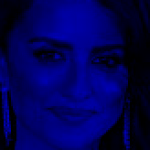

In [0]:
#read images into numpy arrays - Penelope
images_penelope=[]
red_channels_penelope=[]
green_channels_penelope=[]
blue_channels_penelope=[]

for i in smjpegs_penelope:
    pict=cv2.imread(i)
    images_penelope.append(pict)
    
    red=pict[:,:,2]
    red_channels_penelope.append(red)
    
    green=pict[:,:,1]
    green_channels_penelope.append(green)
    
    blue=pict[:,:,0]
    blue_channels_penelope.append(blue)

#just show the blue channel pixels from an image
blue_image = images_penelope[0].copy()
blue_image[:,:,1] = 0
blue_image[:,:,2] = 0
cv2_imshow(blue_image)

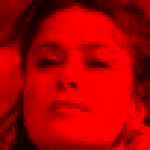

In [0]:
#read images into numpy arrays - Salma
images_salma=[]
red_channels_salma=[]
green_channels_salma=[]
blue_channels_salma=[]

for i in smjpegs_salma:
    pict=cv2.imread(i)
    images_salma.append(pict)
    
    red=pict[:,:,2]
    red_channels_salma.append(red)
    
    green=pict[:,:,1]
    green_channels_salma.append(green)
    
    blue=pict[:,:,0]
    blue_channels_salma.append(blue)

#just show the red channel pixels from an image
red_image = images_salma[0].copy()
red_image[:,:,0] = 0
red_image[:,:,1] = 0
cv2_imshow(red_image)

**Mean of the pixels (all channels)**

Penelope,minimum of mean pixels: 67.2332
Penelope,maximum of mean pixels: 201.74628148148147
Penelope,standard deviation of mean pixels: 20.941888967693973


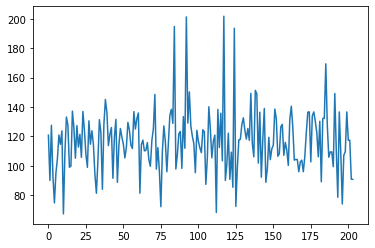

In [0]:
#mean of the pixels from all channels-Penelope
mean_pixels_penelope=[]
for j in range(len(images_penelope)):
    mean_pixels_penelope.append(images_penelope[j].mean())

print('Penelope,minimum of mean pixels: {}'.format(min(mean_pixels_penelope)))
print('Penelope,maximum of mean pixels: {}'.format(max(mean_pixels_penelope)))
print('Penelope,standard deviation of mean pixels: {}'.format(st.stdev(mean_pixels_penelope)))

plt.figure()
plt.plot(mean_pixels_penelope)
plt.show()

Salma,minimum of mean pixels: 56.4570962962963
Salma,maximum of mean pixels: 187.74447407407408
Salma,standard deviation of mean pixels: 21.039805466470124


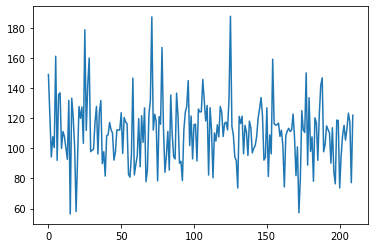

In [0]:
#mean of the pixels from all channels-Salma
mean_pixels_salma=[]
for j in range(len(images_salma)):
    mean_pixels_salma.append(images_salma[j].mean())

print('Salma,minimum of mean pixels: {}'.format(min(mean_pixels_salma)))
print('Salma,maximum of mean pixels: {}'.format(max(mean_pixels_salma)))
print('Salma,standard deviation of mean pixels: {}'.format(st.stdev(mean_pixels_salma)))

plt.figure()
plt.plot(mean_pixels_salma)
plt.show()

**Standard deviation of the pixels (all channels)**

Penelope,minimum of std pixels: 40.77832345044528
Penelope,maximum of std pixels: 86.39137145917209
Penelope,standard deviation of std pixels: 8.514579236236619


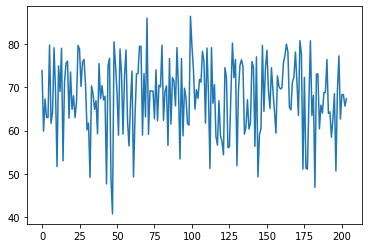

In [0]:
#std of pixels from all channels-Penelope
std_pixels_penelope=[]
for j in range(len(images_penelope)):
    std_pixels_penelope.append(np.std(images_penelope[j]))

print('Penelope,minimum of std pixels: {}'.format(min(std_pixels_penelope)))
print('Penelope,maximum of std pixels: {}'.format(max(std_pixels_penelope)))
print('Penelope,standard deviation of std pixels: {}'.format(st.stdev(std_pixels_penelope)))

plt.figure()
plt.plot(std_pixels_penelope)
plt.show()

Salma,minimum of std pixels: 47.34945694128405
Salma,maximum of std pixels: 83.87643507839095
Salma,standard deviation of std pixels: 7.424323824396224


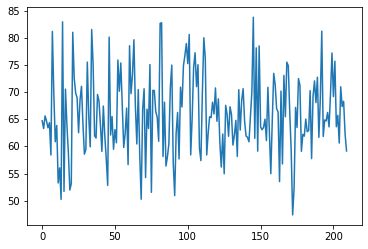

In [0]:
#std of pixels from all channels-Salma
std_pixels_salma=[]
for j in range(len(images_salma)):
    std_pixels_salma.append(np.std(images_salma[j]))

print('Salma,minimum of std pixels: {}'.format(min(std_pixels_salma)))
print('Salma,maximum of std pixels: {}'.format(max(std_pixels_salma)))
print('Salma,standard deviation of std pixels: {}'.format(st.stdev(std_pixels_salma)))

plt.figure()
plt.plot(std_pixels_salma)
plt.show()

**Mean of pixels from color channels**

Plot of the means the red channels for all the pictures


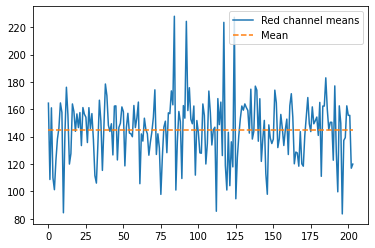

Penelope,minimum of the mean red channel pixels:83.48608888888889
Penelope,maximum of the mean red channel pixels:228.032
Penelope,std of the mean red channel pixels:23.29041930063233
Penelope,mean of the mean red channel pixels:145.05599281045752

Plot of the means the green channels for all the pictures


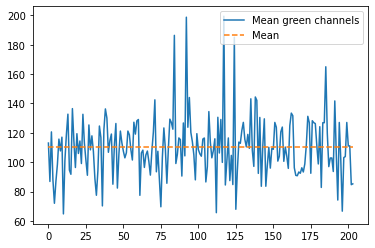

Penelope,minimum of the mean green channel pixels:64.74546666666667
Penelope,maximum of the mean green channel pixels:199.40066666666667
Penelope,std of the mean green channel pixels:20.795239546931104
Penelope,mean of the mean green channel pixels:110.14951699346405

Plot of the means the blue channels for all the pictures


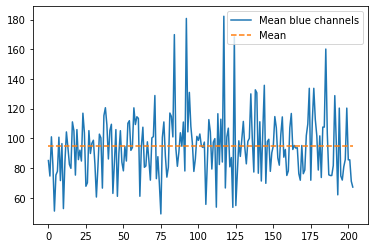

Penelope,minimum of the mean blue channel pixels:49.050844444444444
Penelope,maximum of the mean blue channel pixels:182.27568888888888
Penelope,std of the mean blue channel pixels:21.833372894955822
Penelope,mean of the mean blue channel pixels:94.51525446623094

Mean RGB results of the first 50 pictures - Penelope


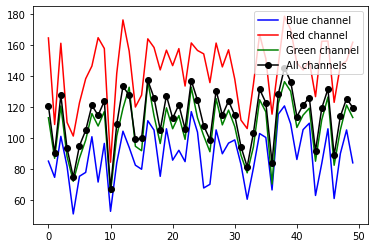

In [0]:
#Penelope
#red channels
mean_rpixels_penelope=[]
for j in range(len(red_channels_penelope)):
    mean_rpixels_penelope.append(red_channels_penelope[j].mean())

print('Plot of the means the red channels for all the pictures')
y_mean = [np.mean(mean_rpixels_penelope)]*len(red_channels_penelope)
fig,ax = plt.subplots()
data_line = ax.plot(mean_rpixels_penelope, label='Red channel means')
mean_line = ax.plot(y_mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Penelope,minimum of the mean red channel pixels:{}'.format(min(mean_rpixels_penelope)))
print('Penelope,maximum of the mean red channel pixels:{}'.format(max(mean_rpixels_penelope)))
print('Penelope,std of the mean red channel pixels:{}'.format(st.stdev(mean_rpixels_penelope)))
print('Penelope,mean of the mean red channel pixels:{}'.format(st.mean(mean_rpixels_penelope)))

#green channels
mean_gpixels_penelope=[]
for j in range(len(green_channels_penelope)):
    mean_gpixels_penelope.append(green_channels_penelope[j].mean())

print('\nPlot of the means the green channels for all the pictures')
y_mean = [np.mean(mean_gpixels_penelope)]*len(green_channels_penelope)
fig,ax = plt.subplots()
data_line = ax.plot(mean_gpixels_penelope, label='Mean green channels')
mean_line = ax.plot(y_mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Penelope,minimum of the mean green channel pixels:{}'.format(min(mean_gpixels_penelope)))
print('Penelope,maximum of the mean green channel pixels:{}'.format(max(mean_gpixels_penelope)))
print('Penelope,std of the mean green channel pixels:{}'.format(st.stdev(mean_gpixels_penelope)))
print('Penelope,mean of the mean green channel pixels:{}'.format(st.mean(mean_gpixels_penelope)))

#blue channels
mean_bpixels_penelope=[]
for j in range(len(blue_channels_penelope)):
    mean_bpixels_penelope.append(blue_channels_penelope[j].mean())

print('\nPlot of the means the blue channels for all the pictures')
y_mean = [np.mean(mean_bpixels_penelope)]*len(blue_channels_penelope)
fig,ax = plt.subplots()
data_line = ax.plot(mean_bpixels_penelope, label='Mean blue channels')
mean_line = ax.plot(y_mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Penelope,minimum of the mean blue channel pixels:{}'.format(min(mean_bpixels_penelope)))
print('Penelope,maximum of the mean blue channel pixels:{}'.format(max(mean_bpixels_penelope)))
print('Penelope,std of the mean blue channel pixels:{}'.format(st.stdev(mean_bpixels_penelope)))
print('Penelope,mean of the mean blue channel pixels:{}'.format(st.mean(mean_bpixels_penelope)))

#plot the mean RGB results of the first 50 pictures
print('\nMean RGB results of the first 50 pictures - Penelope')
fig,ax = plt.subplots()
ax.plot(mean_bpixels_penelope[0:50],color="blue",label='Blue channel')
ax.plot(mean_rpixels_penelope[0:50],color="red",label='Red channel')
ax.plot(mean_gpixels_penelope[0:50],color="green",label='Green channel')
ax.plot(mean_pixels_penelope[0:50],'-o',color="black",label='All channels')
ax.legend(loc='upper right')
plt.show()

Plot of the means the red channels for all the pictures


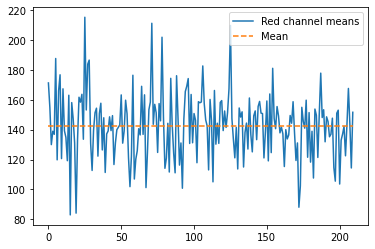

Salma,minimum of the mean red channel pixels:82.8403111111111
Salma,maximum of the mean red channel pixels:215.46537777777777
Salma,std of the mean red channel pixels:21.716406345361023
Salma,mean of the mean red channel pixels:142.6887966137566

Plot of the means the green channels for all the pictures


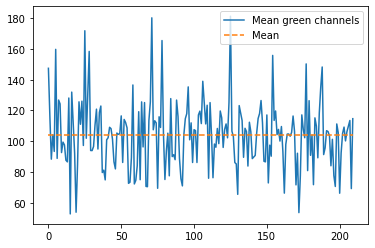

Salma,minimum of the mean green channel pixels:52.778933333333335
Salma,maximum of the mean green channel pixels:181.23973333333333
Salma,std of the mean green channel pixels:21.763690338207613
Salma,mean of the mean green channel pixels:103.94600677248677

Plot of the means the blue channels for all the pictures


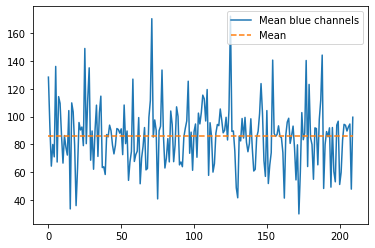

Salma,minimum of the mean blue channel pixels:30.1712
Salma,maximum of the mean blue channel pixels:172.04093333333333
Salma,std of the mean blue channel pixels:22.644255591169458
Salma,mean of the mean blue channel pixels:86.02042433862434

Mean RGB results of the first 50 pictures - Salma


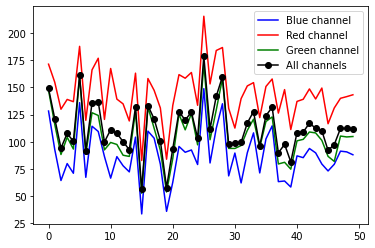

In [0]:
#Salma
#red channels
mean_rpixels_salma=[]
for j in range(len(red_channels_salma)):
    mean_rpixels_salma.append(red_channels_salma[j].mean())

print('Plot of the means the red channels for all the pictures')
y_mean = [np.mean(mean_rpixels_salma)]*len(red_channels_salma)
fig,ax = plt.subplots()
data_line = ax.plot(mean_rpixels_salma, label='Red channel means')
mean_line = ax.plot(y_mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Salma,minimum of the mean red channel pixels:{}'.format(min(mean_rpixels_salma)))
print('Salma,maximum of the mean red channel pixels:{}'.format(max(mean_rpixels_salma)))
print('Salma,std of the mean red channel pixels:{}'.format(st.stdev(mean_rpixels_salma)))
print('Salma,mean of the mean red channel pixels:{}'.format(st.mean(mean_rpixels_salma)))

#green channels
mean_gpixels_salma=[]
for j in range(len(green_channels_salma)):
    mean_gpixels_salma.append(green_channels_salma[j].mean())

print('\nPlot of the means the green channels for all the pictures')
y_mean = [np.mean(mean_gpixels_salma)]*len(green_channels_salma)
fig,ax = plt.subplots()
data_line = ax.plot(mean_gpixels_salma, label='Mean green channels')
mean_line = ax.plot(y_mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Salma,minimum of the mean green channel pixels:{}'.format(min(mean_gpixels_salma)))
print('Salma,maximum of the mean green channel pixels:{}'.format(max(mean_gpixels_salma)))
print('Salma,std of the mean green channel pixels:{}'.format(st.stdev(mean_gpixels_salma)))
print('Salma,mean of the mean green channel pixels:{}'.format(st.mean(mean_gpixels_salma)))

#blue channels
mean_bpixels_salma=[]
for j in range(len(blue_channels_salma)):
    mean_bpixels_salma.append(blue_channels_salma[j].mean())

print('\nPlot of the means the blue channels for all the pictures')
y_mean = [np.mean(mean_bpixels_salma)]*len(blue_channels_salma)
fig,ax = plt.subplots()
data_line = ax.plot(mean_bpixels_salma, label='Mean blue channels')
mean_line = ax.plot(y_mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Salma,minimum of the mean blue channel pixels:{}'.format(min(mean_bpixels_salma)))
print('Salma,maximum of the mean blue channel pixels:{}'.format(max(mean_bpixels_salma)))
print('Salma,std of the mean blue channel pixels:{}'.format(st.stdev(mean_bpixels_salma)))
print('Salma,mean of the mean blue channel pixels:{}'.format(st.mean(mean_bpixels_salma)))

#plot the mean RGB results of the first 50 pictures
print('\nMean RGB results of the first 50 pictures - Salma')
fig,ax = plt.subplots()
ax.plot(mean_bpixels_salma[0:50],color="blue",label='Blue channel')
ax.plot(mean_rpixels_salma[0:50],color="red",label='Red channel')
ax.plot(mean_gpixels_salma[0:50],color="green",label='Green channel')
ax.plot(mean_pixels_salma[0:50],'-o',color="black",label='All channels')
ax.legend(loc='upper right')
plt.show()

**Standard deviation of pixels from color channels**

Plot of the stds the red channels for all the pictures


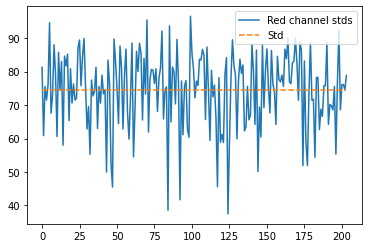

Penelope,minimum of the std red channel pixels:37.44383318910249
Penelope,maximum of the std red channel pixels:96.57207645332404
Penelope,std of the std red channel pixels:11.246844396583006
Penelope,mean of the std red channel pixels:74.53597582647652

Plot of the stds the green channels for all the pictures


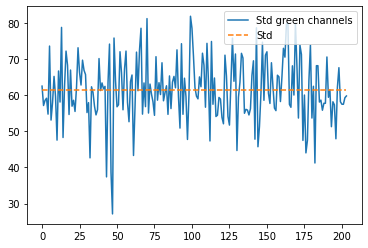

Penelope,minimum of the std green channel pixels:27.126530110212162
Penelope,maximum of the std green channel pixels:81.77952356275445
Penelope,std of the std green channel pixels:8.832199910194333
Penelope,mean of the std green channel pixels:61.46815337221827

Plot of the stds the blue channels for all the pictures


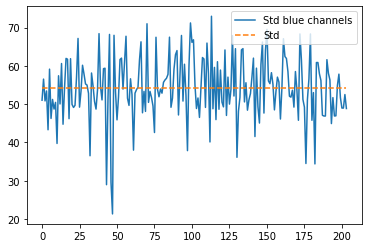

Penelope,minimum of the std blue channel pixels:21.31805931338237
Penelope,maximum of the std blue channel pixels:72.9443070588399
Penelope,std of the std blue channel pixels:8.195330632139651
Penelope,mean of the std blue channel pixels:54.19077946393599

Std RGB results of the first 50 pictures - Penelope


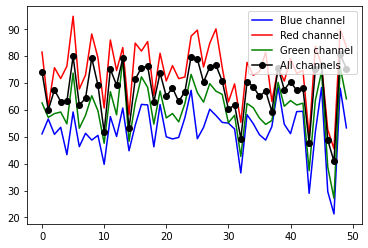

In [0]:
#Penelope
#red channels
std_rpixels_penelope=[]
for j in range(len(red_channels_penelope)):
    std_rpixels_penelope.append(red_channels_penelope[j].std())

print('Plot of the stds the red channels for all the pictures')
y_std = [np.mean(std_rpixels_penelope)]*len(red_channels_penelope)
fig,ax = plt.subplots()
data_line = ax.plot(std_rpixels_penelope, label='Red channel stds')
std_line = ax.plot(y_std, label='Std', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Penelope,minimum of the std red channel pixels:{}'.format(min(std_rpixels_penelope)))
print('Penelope,maximum of the std red channel pixels:{}'.format(max(std_rpixels_penelope)))
print('Penelope,std of the std red channel pixels:{}'.format(st.stdev(std_rpixels_penelope)))
print('Penelope,mean of the std red channel pixels:{}'.format(st.mean(std_rpixels_penelope)))

#green channels
std_gpixels_penelope=[]
for j in range(len(green_channels_penelope)):
    std_gpixels_penelope.append(green_channels_penelope[j].std())

print('\nPlot of the stds the green channels for all the pictures')
y_std = [np.mean(std_gpixels_penelope)]*len(green_channels_penelope)
fig,ax = plt.subplots()
data_line = ax.plot(std_gpixels_penelope, label='Std green channels')
std_line = ax.plot(y_std, label='Std', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Penelope,minimum of the std green channel pixels:{}'.format(min(std_gpixels_penelope)))
print('Penelope,maximum of the std green channel pixels:{}'.format(max(std_gpixels_penelope)))
print('Penelope,std of the std green channel pixels:{}'.format(st.stdev(std_gpixels_penelope)))
print('Penelope,mean of the std green channel pixels:{}'.format(st.mean(std_gpixels_penelope)))

#blue channels
std_bpixels_penelope=[]
for j in range(len(blue_channels_penelope)):
    std_bpixels_penelope.append(blue_channels_penelope[j].std())

print('\nPlot of the stds the blue channels for all the pictures')
y_std = [np.mean(std_bpixels_penelope)]*len(blue_channels_penelope)
fig,ax = plt.subplots()
data_line = ax.plot(std_bpixels_penelope, label='Std blue channels')
std_line = ax.plot(y_std, label='Std', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Penelope,minimum of the std blue channel pixels:{}'.format(min(std_bpixels_penelope)))
print('Penelope,maximum of the std blue channel pixels:{}'.format(max(std_bpixels_penelope)))
print('Penelope,std of the std blue channel pixels:{}'.format(st.stdev(std_bpixels_penelope)))
print('Penelope,mean of the std blue channel pixels:{}'.format(st.mean(std_bpixels_penelope)))

#plot the std RGB results of the first 50 pictures
print('\nStd RGB results of the first 50 pictures - Penelope')
fig,ax = plt.subplots()
ax.plot(std_bpixels_penelope[0:50],color="blue",label='Blue channel')
ax.plot(std_rpixels_penelope[0:50],color="red",label='Red channel')
ax.plot(std_gpixels_penelope[0:50],color="green",label='Green channel')
ax.plot(std_pixels_penelope[0:50],'-o',color="black",label='All channels')
ax.legend(loc='upper right')
plt.show()

Plot of the stds the red channels for all the pictures


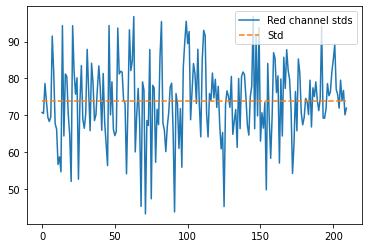

Salma,minimum of the std red channel pixels:43.3306980458171
Salma,maximum of the std red channel pixels:96.83810892013358
Salma,std of the std red channel pixels:10.679396085520716
Salma,mean of the std red channel pixels:73.8921385869104

Plot of the stds the green channels for all the pictures


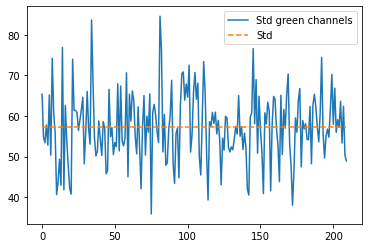

Salma,minimum of the std green channel pixels:35.862286999321846
Salma,maximum of the std green channel pixels:84.59942937524629
Salma,std of the std green channel pixels:8.572912759491475
Salma,mean of the std green channel pixels:57.26355059288244

Plot of the stds the blue channels for all the pictures


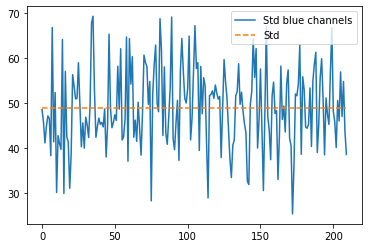

Salma,minimum of the std blue channel pixels:25.33022308766962
Salma,maximum of the std blue channel pixels:69.36049618749712
Salma,std of the std blue channel pixels:8.89501995297341
Salma,mean of the std blue channel pixels:48.99198160045583

Std RGB results of the first 50 pictures - Salma


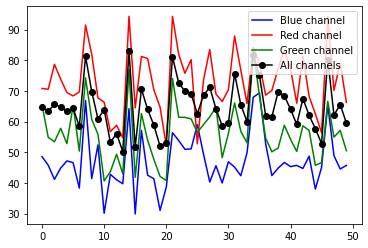

In [0]:
#Salma
#red channels
std_rpixels_salma=[]
for j in range(len(red_channels_salma)):
    std_rpixels_salma.append(red_channels_salma[j].std())

print('Plot of the stds the red channels for all the pictures')
y_std = [np.mean(std_rpixels_salma)]*len(red_channels_salma)
fig,ax = plt.subplots()
data_line = ax.plot(std_rpixels_salma, label='Red channel stds')
std_line = ax.plot(y_std, label='Std', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Salma,minimum of the std red channel pixels:{}'.format(min(std_rpixels_salma)))
print('Salma,maximum of the std red channel pixels:{}'.format(max(std_rpixels_salma)))
print('Salma,std of the std red channel pixels:{}'.format(st.stdev(std_rpixels_salma)))
print('Salma,mean of the std red channel pixels:{}'.format(st.mean(std_rpixels_salma)))

#green channels
std_gpixels_salma=[]
for j in range(len(green_channels_salma)):
    std_gpixels_salma.append(green_channels_salma[j].std())

print('\nPlot of the stds the green channels for all the pictures')
y_std = [np.mean(std_gpixels_salma)]*len(green_channels_salma)
fig,ax = plt.subplots()
data_line = ax.plot(std_gpixels_salma, label='Std green channels')
std_line = ax.plot(y_std, label='Std', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Salma,minimum of the std green channel pixels:{}'.format(min(std_gpixels_salma)))
print('Salma,maximum of the std green channel pixels:{}'.format(max(std_gpixels_salma)))
print('Salma,std of the std green channel pixels:{}'.format(st.stdev(std_gpixels_salma)))
print('Salma,mean of the std green channel pixels:{}'.format(st.mean(std_gpixels_salma)))

#blue channels
std_bpixels_salma=[]
for j in range(len(blue_channels_salma)):
    std_bpixels_salma.append(blue_channels_salma[j].std())

print('\nPlot of the stds the blue channels for all the pictures')
y_std = [np.mean(std_bpixels_salma)]*len(blue_channels_salma)
fig,ax = plt.subplots()
data_line = ax.plot(std_bpixels_salma, label='Std blue channels')
std_line = ax.plot(y_std, label='Std', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()

print('Salma,minimum of the std blue channel pixels:{}'.format(min(std_bpixels_salma)))
print('Salma,maximum of the std blue channel pixels:{}'.format(max(std_bpixels_salma)))
print('Salma,std of the std blue channel pixels:{}'.format(st.stdev(std_bpixels_salma)))
print('Salma,mean of the std blue channel pixels:{}'.format(st.mean(std_bpixels_salma)))

#plot the std RGB results of the first 50 pictures
print('\nStd RGB results of the first 50 pictures - Salma')
fig,ax = plt.subplots()
ax.plot(std_bpixels_salma[0:50],color="blue",label='Blue channel')
ax.plot(std_rpixels_salma[0:50],color="red",label='Red channel')
ax.plot(std_gpixels_salma[0:50],color="green",label='Green channel')
ax.plot(std_pixels_salma[0:50],'-o',color="black",label='All channels')
ax.legend(loc='upper right')
plt.show()

# **PCA**


As color images can have quite a huge amount of features, we decided to apply principle component analysis. With explaining 80% of the feature (pixel) variance with PCA we managed to lower the number of features from 67500 into 26 and 27 components.

In [0]:
#import necessary libraries 
import os
os.chdir("/content/drive/My Drive/Turing Machine Learning")
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from sklearn.decomposition import PCA

In [0]:
# define the path to load the images of Salma 
path_general='/content/drive/My Drive/Turing Machine Learning'
smjpegs_salma = [f for f in glob.glob(path_general + '/salma_hayek_cropped'+'/*.jpg')]

#define the path to load the images of Penelope 
smjpegs_penelope = [f for f in glob.glob(path_general + '/penelope_cruz_cropped'+'/*.jpg')]

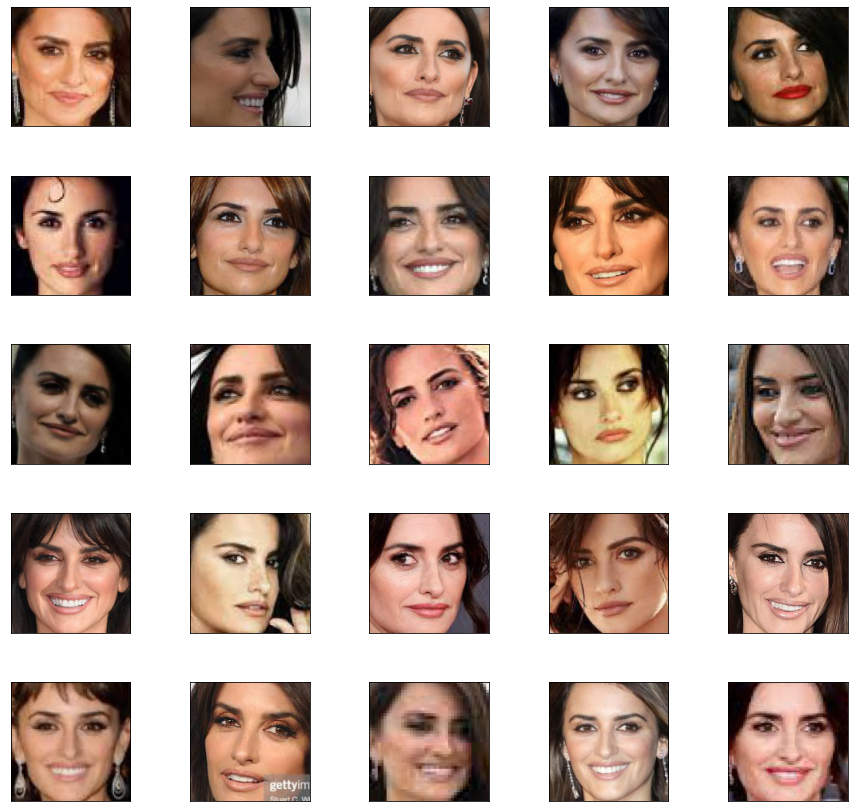

In [0]:
#Penelope
images_penelope=[]
faces_penelope = pd.DataFrame([])
for path_image in smjpegs_penelope:
 img=imread(path_image)
 face = pd.Series(img.flatten(),name=path_image)
 faces_penelope = faces_penelope.append(face) 
 images_penelope.append(img)

#first 25 images from the dataset
fig, axes = plt.subplots(5,5,figsize=(15,15), #fig size->how many images we have
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(wspace=0.5))
for i, ax in enumerate(axes.flat):
 ax.imshow(images_penelope[i])

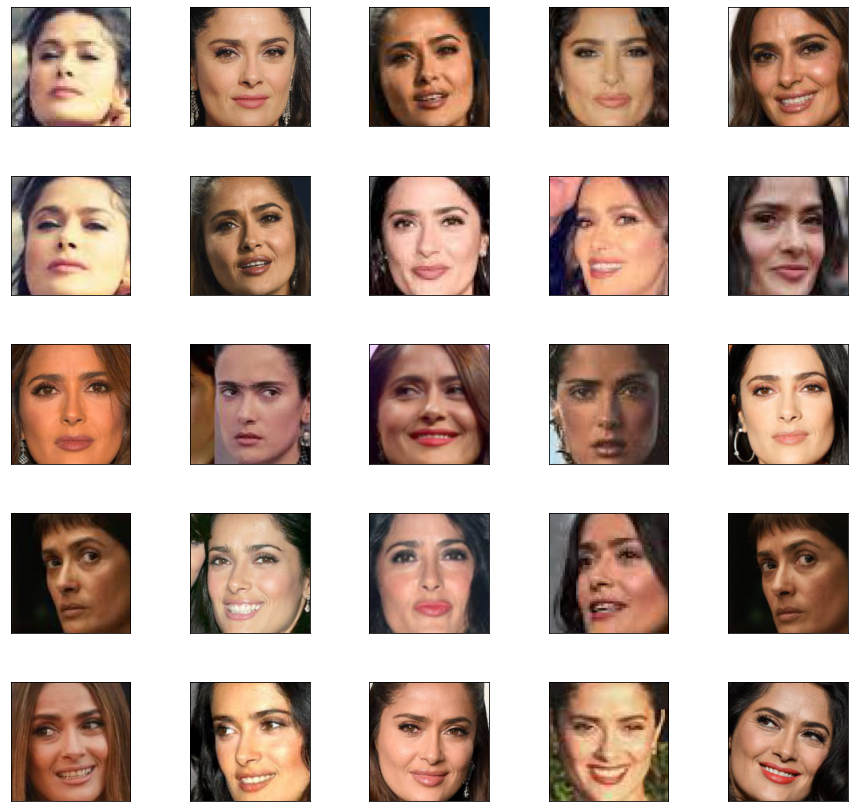

In [0]:
#Salma
images_salma=[]
faces_salma = pd.DataFrame([])
for path_image in smjpegs_salma:
 img=imread(path_image)
 face = pd.Series(img.flatten(),name=path_image)
 faces_salma = faces_salma.append(face) 
 images_salma.append(img)

#first 25 images from the dataset
fig, axes = plt.subplots(5,5,figsize=(15,15), #fig size->how many images we have
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(wspace=0.5))
for i, ax in enumerate(axes.flat):
 ax.imshow(images_salma[i])

In [0]:
#n_components=? -> % of variance explained
pca_penelope = PCA(n_components = 0.80,random_state=0).fit(faces_penelope)
pca_salma = PCA(n_components = 0.80,random_state=0).fit(faces_salma)

#check how many components are chosen
print('Penelope, number of components chosen:{}'.format(pca_penelope.n_components_))
print('Salma, number of components chosen:{}'.format(pca_salma.n_components_))

Penelope, number of components chosen:27
Salma, number of components chosen:26


In [0]:
#transform the original images-Penelope
penelope_pca = pca_penelope.transform(faces_penelope)
print('Penelope, original shape of dataset:{}'.format(faces_penelope.shape, penelope_pca.shape))
print('Penelope, shape of a component:{}'.format(pca_penelope.components_[0].shape))

Penelope, original shape of dataset:(204, 67500)
Penelope, shape of a component:(67500,)


In [0]:
#transform the original images-Salma
salma_pca = pca_salma.transform(faces_salma)
print('Salma, original shape of dataset:{}'.format(faces_salma.shape, salma_pca.shape))
print('Salma, shape of a component:{}'.format(pca_salma.components_[0].shape))

Salma, original shape of dataset:(210, 67500)
Salma, shape of a component:(67500,)


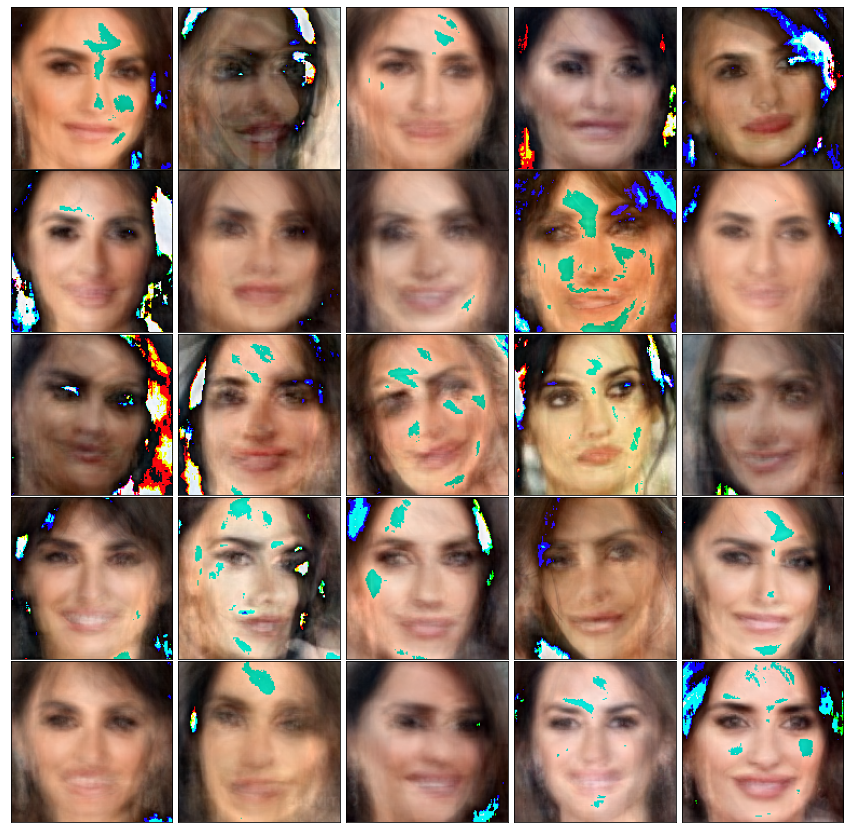

In [0]:
#lower dimensional images - Penelope
fig, axes = plt.subplots(5,5,figsize=(15,15),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_penelope.inverse_transform(penelope_pca)[i].reshape(150,150,3).astype(np.uint8),cmap='gray')

In [0]:
#save Penelope PCA images to Google Drive
from google.colab import files
import os

num=0
for i in range(0,len(faces_penelope.index)):
  path=faces_penelope.index[i]
  name=path.split('/')

  #we had to create penelope_cruz_pca folder manually
  os.chdir("/content/drive/My Drive/Turing Machine Learning/penelope_cruz_pca")
  try:
    plt.imshow(pca_penelope.inverse_transform(penelope_pca)[i].reshape(150,150,3).astype(np.uint8),cmap='gray')
    plt.axis('off')
    plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
    files.download(name[len(name)-1])
    num=num+1

  except FileNotFoundError:
    print(path) 

#print('Number of pictures saved {}'.format(num))

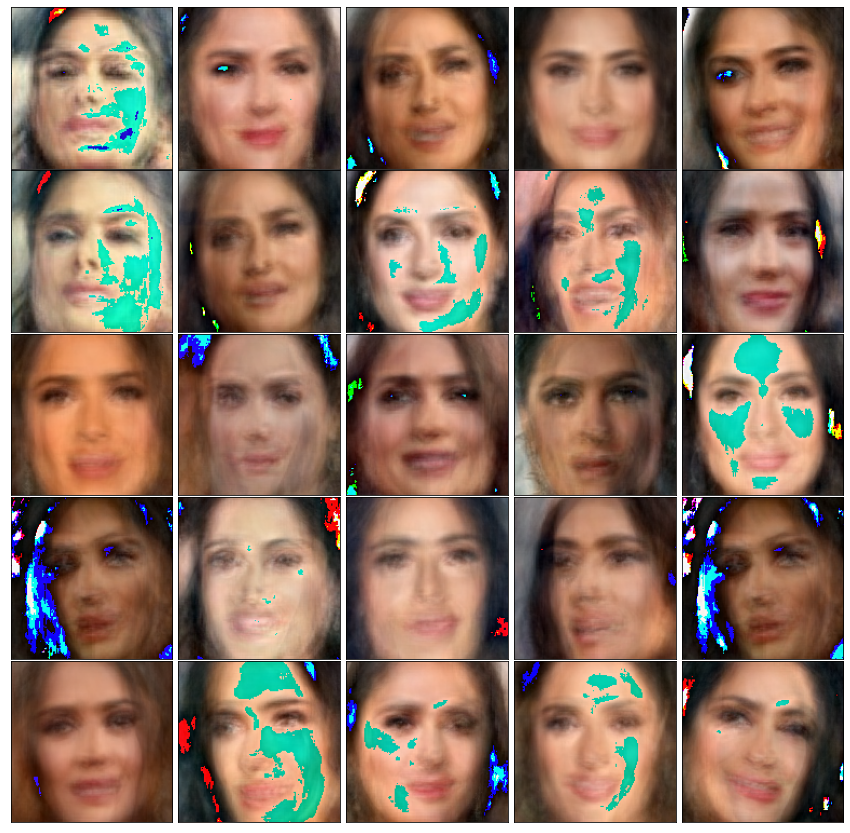

In [0]:
#lower dimensional images - Salma
fig, axes = plt.subplots(5,5,figsize=(15,15),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_salma.inverse_transform(salma_pca)[i].reshape(150,150,3).astype(np.uint8),cmap='gray')

In [0]:
#save Salma PCA images to Google Drive
from google.colab import files
import os

num=0
for i in range(0,len(faces_salma.index)):
  path=faces_salma.index[i]
  name=path.split('/')

  #we had to create salma_hayek_pca folder manually
  os.chdir("/content/drive/My Drive/Turing Machine Learning/salma_hayek_pca")
  try:
    plt.imshow(pca_salma.inverse_transform(salma_pca)[i].reshape(150,150,3).astype(np.uint8),cmap='gray')
    plt.axis('off')
    plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
    files.download(name[len(name)-1])
    num=num+1

  except FileNotFoundError:
    print(path) 

#print('Number of pictures saved {}'.format(num))

# **LOGISTIC REGRESSION**

Since we want to predict whether a new image is of Salma Hayek or of Penelope Cruz our model will classify images and the dependent variable will be equal to 1 if the image is of Penelope and it will be equal to 0 if the image is of Salma. Logistic regression uses sigmoid function to map continuous values between 0 and 1. The goal is to find such a combination of features of the input examples that will that will minimize the cost function which in this case is given by the log-likelihood function. 

In [0]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import necessary libraries 
import os
os.chdir("/content/drive/My Drive/Turing Machine Learning")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from matplotlib.pyplot import imread
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# define the path to load the images of Salma 
path_general='/content/drive/My Drive/Turing Machine Learning'
smjpegs_salma = [f for f in glob.glob(path_general + '/salma_hayek_cropped'+'/*.jpg')]

In [0]:
#read images of Salma into a flattened dataframe
faces_salma = pd.DataFrame([])

for path_image in smjpegs_salma:
 img=imread(path_image)
 face = pd.Series(img.flatten(),name=path_image)
 faces_salma = faces_salma.append(face) 

print('Number of Salma pictures:{}'.format(len(faces_salma)))

Number of Salma pictures:210


In [0]:
#add column salma=0 
classes = np.zeros((faces_salma.shape[0],1))
faces_salma["classes"] = classes

In [0]:
#define the path to load the images of Penelope 
smjpegs_penelope = [f for f in glob.glob(path_general + '/penelope_cruz_cropped'+'/*.jpg')]

In [0]:
#read images of Penelope into a flattened dataframe
faces_penelope = pd.DataFrame([])

for path_image in smjpegs_penelope:
 img=imread(path_image)
 face = pd.Series(img.flatten(),name=path_image)
 faces_penelope = faces_penelope.append(face) 

print('Number of Penelope pictures:{}'.format(len(faces_penelope)))

Number of Penelope pictures:204


In [0]:
#add column penelope=1
classes = np.ones((faces_penelope.shape[0],1))
faces_penelope["classes"] = classes

In [0]:
#final data set
faces = pd.concat([faces_salma,faces_penelope])

In [0]:
# create train and test data set
train, test = train_test_split(faces, test_size=0.2,random_state=10)

In [0]:
# checking frequencies
# 53% for class = 0 (Salma) and 47% for class = 1 (Penelope)
classes_tab = pd.crosstab(index=faces["classes"],columns="count")
classes_tab/classes_tab.sum()

classes_train = pd.crosstab(index=train["classes"],columns="count")
classes_train/classes_train.sum()

classes_test = pd.crosstab(index=test["classes"],columns="count")
classes_test/classes_test.sum()

col_0      count
classes         
0.0      0.46988
1.0      0.53012

In [0]:
# create y and x for train and test sets 
y_test =pd.DataFrame(test["classes"])
y_train =pd.DataFrame(train["classes"])

x_test = test.drop("classes",axis=1)
x_train = train.drop("classes",axis=1)

In [0]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

# fit logistic regression on the train set 
logisticRegr.fit(x_train, y_train)

# do predictions on the test set 
predictions = logisticRegr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The metric according to which we will evaluate the predictive performance of the model and compare it to other models is called accuracy and it is a fraction of the predictions that were classified correctly. We could have also chosen to look more in detail how many observations from each class were classified correctly, but as our classes are balanced it should be quite even.

In [0]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print('The accuracy score of the Logistic Regression model is {} (rounded to 4 digits)'.format(round(score,4)))

The accuracy score of the Logistic Regression model is 0.8916 (rounded to 4 digits)


We can visualize the performance of the classifier with the confusion matrix, where we can see how many observations per class were classified correctly.

In [0]:
#confussion matrix of the test set
cm = metrics.confusion_matrix(y_test, predictions)
print('Confusion matrix of the Logistic Regressions:')
print(pd.DataFrame(cm))

Confusion matrix of the Logistic Regressions:
    0   1
0  34   5
1   4  40


Text(0.5, 1.0, 'Accuracy Score: 0.891566265060241')

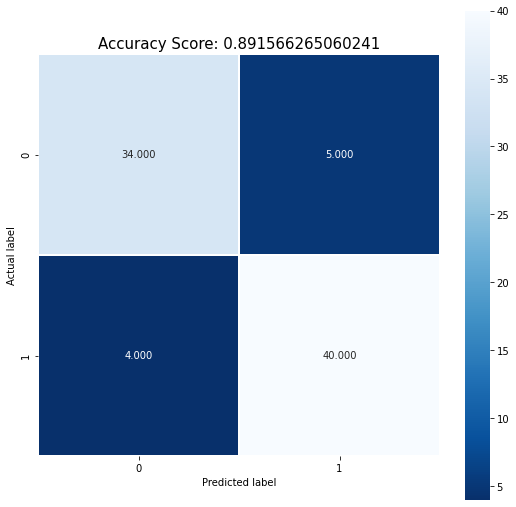

In [0]:
#confussion matrix plot
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

**Saving the train/test dataframes, images to Google Drive**

In order to be able to compare logistic regression and CNN, we used the same train/test split for both methods.

In [0]:
#checking the indices
print(x_test.index[0:4])
print(y_test.index[0:4])

print(x_train.index[0:4])
print(y_train.index[0:4])

Index(['/content/drive/My Drive/Turing Machine Learning/penelope_cruz_cropped/0bb04c792c.jpg',
       '/content/drive/My Drive/Turing Machine Learning/penelope_cruz_cropped/aedb879ba8.jpg',
       '/content/drive/My Drive/Turing Machine Learning/salma_hayek_cropped/00e1225935.jpg',
       '/content/drive/My Drive/Turing Machine Learning/salma_hayek_cropped/525e79f3a0.jpg'],
      dtype='object')
Index(['/content/drive/My Drive/Turing Machine Learning/penelope_cruz_cropped/0bb04c792c.jpg',
       '/content/drive/My Drive/Turing Machine Learning/penelope_cruz_cropped/aedb879ba8.jpg',
       '/content/drive/My Drive/Turing Machine Learning/salma_hayek_cropped/00e1225935.jpg',
       '/content/drive/My Drive/Turing Machine Learning/salma_hayek_cropped/525e79f3a0.jpg'],
      dtype='object')
Index(['/content/drive/My Drive/Turing Machine Learning/salma_hayek_cropped/507491b127.jpg',
       '/content/drive/My Drive/Turing Machine Learning/salma_hayek_cropped/8e52b31c5d.jpg',
       '/content

In [0]:
#save train/test dataframes to Google Drive
from google.colab import drive
drive.mount('/gdrive')

#write the dataframes to CSV files
with open('/gdrive/My Drive/Turing Machine Learning/x_train.csv', 'w') as f:
  x_train.to_csv(f)

with open('/gdrive/My Drive/Turing Machine Learning/y_train.csv', 'w') as f:
  y_train.to_csv(f)

with open('/gdrive/My Drive/Turing Machine Learning/x_test.csv', 'w') as f:
  x_test.to_csv(f)

with open('/gdrive/My Drive/Turing Machine Learning/y_test.csv', 'w') as f:
  y_test.to_csv(f)

Mounted at /gdrive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#save test set as images to Google Drive
from google.colab import files
import os

#saving the test images
for i in range(0,len(x_test.index)):
  path=x_test.index[i]
  name=path.split('/')

  if name[len(name)-2]=='penelope_cruz_cropped':
    #we had to create Test/penelope folder manually
    os.chdir("/content/drive/My Drive/Turing Machine Learning/Test/penelope")
    try:
      img = imread(path)
      img = img.astype(np.uint8)

      plt.imshow(img,cmap='gray')
      plt.axis('off')
      plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
      files.download(name[len(name)-1])

    except FileNotFoundError:
      print(path) 

  elif name[len(name)-2]=='salma_hayek_cropped':
    #we had to create Test/salma folder manually
    os.chdir("/content/drive/My Drive/Turing Machine Learning/Test/salma")
    try:
      img = imread(path)
      img = img.astype(np.uint8)

      plt.imshow(img,cmap='gray')
      plt.axis('off')
      plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
      files.download(name[len(name)-1])

    except FileNotFoundError:
      print(path) 

In [0]:
#save train set as images to Google Drive
from google.colab import files
import os

#saving the train images
for i in range(0,len(x_train.index)):
  path=x_train.index[i]
  name=path.split('/')

  if name[len(name)-2]=='penelope_cruz_cropped':
    #we had to create Train/penelope folder manually
    os.chdir("/content/drive/My Drive/Turing Machine Learning/Train/penelope")
    try:
      img = imread(path)
      img = img.astype(np.uint8)

      plt.imshow(img,cmap='gray')
      plt.axis('off')
      plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
      files.download(name[len(name)-1])

    except FileNotFoundError:
      print(path) 

  elif name[len(name)-2]=='salma_hayek_cropped':
    #we had to create Train/salma folder manually
    os.chdir("/content/drive/My Drive/Turing Machine Learning/Train/salma")
    try:
      img = imread(path)
      img = img.astype(np.uint8)

      plt.imshow(img,cmap='gray')
      plt.axis('off')
      plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
      files.download(name[len(name)-1])

    except FileNotFoundError:
      print(path)

**Save PCA resulted images to Drive**

In [0]:
#save test set as images to Google Drive
from google.colab import files
import os

#saving the test images
for i in range(0,len(x_test.index)):
  path=x_test.index[i]
  name=path.split('/')

  if name[len(name)-2]=='penelope_cruz_cropped':
    #we had to create Test/penelope folder manually
    os.chdir("/content/drive/My Drive/Turing Machine Learning/Test_pca/penelope")
    try:
      img = imread('/content/drive/My Drive/Turing Machine Learning/'+'penelope_cruz_pca/'+name[-1])
      img = img.astype(np.uint8)

      plt.imshow(img,cmap='gray')
      plt.axis('off')
      plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
      files.download(name[len(name)-1])

    except FileNotFoundError:
      print(path)

  elif name[len(name)-2]=='salma_hayek_cropped':
    #we had to create Test/salma folder manually
    os.chdir("/content/drive/My Drive/Turing Machine Learning/Test_pca/salma")
    try:
      img = imread('/content/drive/My Drive/Turing Machine Learning/'+'salma_hayek_pca/'+name[-1])
      img = img.astype(np.uint8)

      plt.imshow(img,cmap='gray')
      plt.axis('off')
      plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
      files.download(name[len(name)-1])

    except FileNotFoundError:
      print(path)

#print('Number of pictures saved {}'.format(num))

In [0]:
#save train set as images to Google Drive
from google.colab import files
import os

num=0
#saving the test images
for i in range(0,len(x_train.index)):
  path=x_train.index[i]
  name=path.split('/')

  if name[len(name)-2]=='penelope_cruz_cropped':
    #we had to create Train/penelope folder manually
    os.chdir("/content/drive/My Drive/Turing Machine Learning/Train_pca/penelope")
    try:
      img = imread('/content/drive/My Drive/Turing Machine Learning/'+'penelope_cruz_pca/'+name[-1])
      img = img.astype(np.uint8)

      plt.imshow(img,cmap='gray')
      plt.axis('off')
      plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
      files.download(name[len(name)-1])
      num=num+1

    except FileNotFoundError:
      print(path)

  elif name[len(name)-2]=='salma_hayek_cropped':
    #we had to create Train/salma folder manually
    os.chdir("/content/drive/My Drive/Turing Machine Learning/Train_pca/salma")
    try:
      img = imread('/content/drive/My Drive/Turing Machine Learning/'+'salma_hayek_pca/'+name[-1])
      img = img.astype(np.uint8)

      plt.imshow(img,cmap='gray')
      plt.axis('off')
      plt.savefig(name[len(name)-1],transparent = True, bbox_inches = 'tight', pad_inches = 0)
      files.download(name[len(name)-1])
      num=num+1

    except FileNotFoundError:
      print(path)

#print('Number of pictures saved {}'.format(num)) 

# **CONVOLUTIONAL NEURAL NETWORK**

As we have few observations from each class, we are going to use data augmentation (so that we have the same picture multiple times) to avoid overfitting. We choose to rotate the pictures 40 degrees and shift them 20% of their width and height. Additionally, we rescale the pixels, so they have values between 0 and 1 (as the max value is 255). This way, it is easier for the model to learn.



In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

CNN is consisted of 4 major parts, the Convolution, Pooling, the Flattening and the Full connection. We’ve imported the Sequential function from keras.models to initialise our neural network model as a sequential network.The Conv2D from  is used to perform the convolution operation on the training images  (in 2 dimensional arrays). MaxPooling2D  is used for the pooling operation (extracting features) and finally flattening is the process of converting all the resultant of 2 dimensional arrays into a single long continuous linear vector.

As we have a binary classification output, the sigmoid function was used.

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [0]:
model.summary()

Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_340 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
activation_566 (Activation)  (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_340 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_341 (Conv2D)          (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_567 (Activation)  (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_341 (MaxPoolin (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_342 (Conv2D)          (None, 34, 34, 64)     

In [0]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Turing Machine Learning/Train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Turing Machine Learning/Test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 331 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=331 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=83 // batch_size)
model.save_weights('first_try.h5')

Epoch 1/50
10/10 [==============================] - 3s 254ms/step - loss: 1.0093 - accuracy: 0.5217 - val_loss: 0.6832 - val_accuracy: 0.5469
Epoch 2/50
10/10 [==============================] - 2s 228ms/step - loss: 0.6907 - accuracy: 0.5585 - val_loss: 0.6774 - val_accuracy: 0.5882
Epoch 3/50
10/10 [==============================] - 2s 244ms/step - loss: 0.6739 - accuracy: 0.5844 - val_loss: 0.6391 - val_accuracy: 0.5882
Epoch 4/50
10/10 [==============================] - 2s 247ms/step - loss: 0.6627 - accuracy: 0.6455 - val_loss: 0.7398 - val_accuracy: 0.4844
Epoch 5/50
10/10 [==============================] - 2s 229ms/step - loss: 0.7852 - accuracy: 0.6115 - val_loss: 0.5531 - val_accuracy: 0.8039
Epoch 6/50
10/10 [==============================] - 2s 226ms/step - loss: 0.6101 - accuracy: 0.6923 - val_loss: 0.5627 - val_accuracy: 0.7255
Epoch 7/50
10/10 [==============================] - 3s 267ms/step - loss: 0.6012 - accuracy: 0.6906 - val_loss: 0.5467 - val_accuracy: 0.7344
Epoch 

In [0]:
# list all data in history
print(history.history.keys())
val_acc=history.history['val_accuracy']

from numpy import mean
from numpy import max

print("mean_val_acc",mean(val_acc))
print("max_val_acc",max(val_acc))

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
mean_val_acc 0.8200428986549377
max_val_acc 0.953125


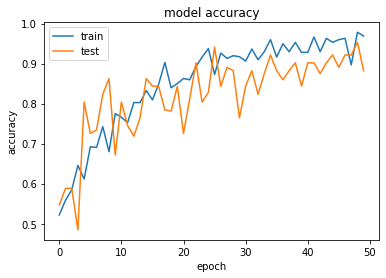

In [0]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

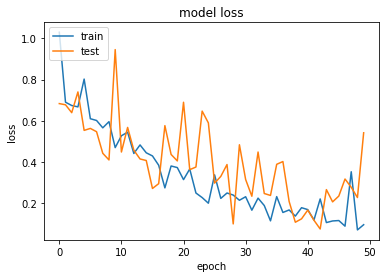

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Tuning CNN**

After the tuning of the CNN hyperparameters, the model suggested that the higher accuracy was obtained with a 32 batch_size and 60 number of epochs.

In [0]:
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
  return model

seed = 7
numpy.random.seed(seed)
batch_size=32

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

dataset = datagen.flow_from_directory(
    '/content/drive/My Drive/Turing Machine Learning/Train',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=batch_size) 

X, Y = dataset.next()

model = KerasClassifier(build_fn=create_model, verbose=0)

epochs = [10, 20, 30, 40, 50, 60] 
batch_size = [16, 32, 64] 
param_grid = dict(epochs=epochs, batch_size=batch_size)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Found 331 images belonging to 2 classes.
Best: 0.648485 using {'batch_size': 32, 'epochs': 60}
0.530303 (0.021427) with: {'batch_size': 16, 'epochs': 10}
0.590909 (0.064282) with: {'batch_size': 16, 'epochs': 20}
0.436364 (0.078554) with: {'batch_size': 16, 'epochs': 30}
0.463636 (0.115708) with: {'batch_size': 16, 'epochs': 40}
0.530303 (0.077258) with: {'batch_size': 16, 'epochs': 50}
0.554545 (0.183777) with: {'batch_size': 16, 'epochs': 60}
0.557576 (0.111423) with: {'batch_size': 32, 'epochs': 10}
0.554545 (0.183777) with: {'batch_size': 32, 'epochs': 20}
0.530303 (0.021427) with: {'batch_size': 32, 'epochs': 30}
0.436364 (0.078554) with: {'batch_size': 32, 'epochs': 40}
0.463636 (0.137470) with: {'batch_size': 32, 'epochs': 50}
0.648485 (0.179582) with: {'batch_size': 32, 'epochs': 60}
0.624242 (0.017142) with: {'batch_size': 64, 'epochs': 10}
0.621212 (0.093400) with: {'batch_size': 64, 'epochs': 20}
0.500000 (0.037113) with: {'batch_size': 64, 'epochs': 30}
0.433333 (0.101323) 

In [0]:
# model with tune parameters

batch_size=32

history = model.fit_generator(
        train_generator,
        steps_per_epoch=331 // batch_size,
        epochs=60,
        validation_data=validation_generator,
        validation_steps=83 // batch_size)

print(history.history.keys())
val_acc_tuned=history.history['val_accuracy']


print("mean_val_acc_tuned",mean(val_acc_tuned))
print("max_val_acc_tuned",max(val_acc_tuned))

Epoch 1/60
10/10 [==============================] - 2s 239ms/step - loss: 0.0275 - accuracy: 0.9933 - val_loss: 0.3187 - val_accuracy: 0.9688
Epoch 2/60
10/10 [==============================] - 3s 256ms/step - loss: 0.0758 - accuracy: 0.9766 - val_loss: 0.1574 - val_accuracy: 0.9608
Epoch 3/60
10/10 [==============================] - 2s 232ms/step - loss: 0.1061 - accuracy: 0.9531 - val_loss: 0.0745 - val_accuracy: 0.9804
Epoch 4/60
10/10 [==============================] - 2s 229ms/step - loss: 0.0496 - accuracy: 0.9784 - val_loss: 0.0533 - val_accuracy: 0.9375
Epoch 5/60
10/10 [==============================] - 3s 267ms/step - loss: 0.0422 - accuracy: 0.9844 - val_loss: 0.1079 - val_accuracy: 0.9412
Epoch 6/60
10/10 [==============================] - 2s 221ms/step - loss: 0.1975 - accuracy: 0.9298 - val_loss: 0.0778 - val_accuracy: 0.9608
Epoch 7/60
10/10 [==============================] - 2s 226ms/step - loss: 0.0496 - accuracy: 0.9820 - val_loss: 0.0765 - val_accuracy: 0.9375
Epoch 

Before tuning the paramerts we got an average accuracy of 82%, and a max accuracy of 95%. After the tuning the average accuracy rose to 95%, while the max accuracy rose to 100%.

## Logistic regression and CNN comparison

Both models perform really good. Logistic regression has an overall accuracy rate of 89%, whearas with CNN we can get to acurracy rates of 95%.

Therefore, although in this case were we had binary classification with balanced classes logistic regression performs good, we can that CNN outperforms logistic regression even achieving an overall accuracy of 100% in the validation date set in some epochs. 




Text(0.5, 1.0, 'Accuracy Score: 0.9701492537313433')

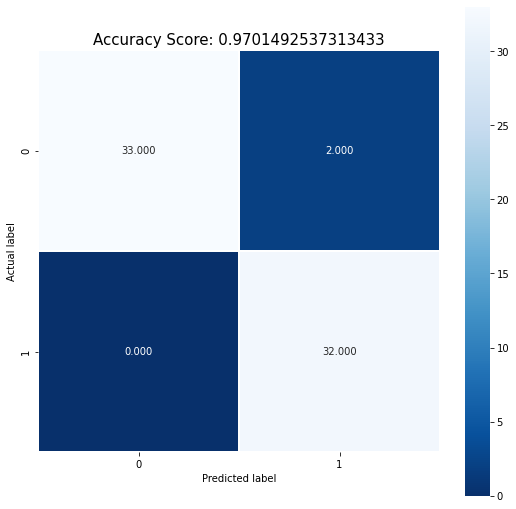

In [0]:
#confussion matrix plot

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [0]:
#confussion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print('Confusion matrix of the Logistic Regressions:')
print(pd.DataFrame(cm))

Confusion matrix of the Logistic Regressions:
    0   1
0  33   2
1   0  32


In [0]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print('The accuracy score of the Logistic Regression model is {} (rounded to 4 digits)'.format(round(score,4)))
# accuracy = 97%

The accuracy score of the Logistic Regression model is 0.9701 (rounded to 4 digits)


In [0]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

# fit logistic regression on the train set 
logisticRegr.fit(x_train, y_train)

# do predictions on the test set 
predictions = logisticRegr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#LOGISTIC REGRESSION WITH PCA#

In [0]:
#import necessary libraries 
import os
os.chdir("/content/drive/My Drive/Turing Machine Learning")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from matplotlib.pyplot import imread
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

In [0]:
# define the path to load the images of Salma 
path_general='/content/drive/My Drive/Turing Machine Learning/Train_pca'
smjpegs_salma = [f for f in glob.glob(path_general + '/salma'+'/*.jpg')]

In [0]:
#read images of Salma into a flattened dataframe
faces_salma = pd.DataFrame([])

for path_image in smjpegs_salma:
 img=imread(path_image)
 face = pd.Series(img.flatten(),name=path_image)
 faces_salma = faces_salma.append(face) 

In [0]:
#add column salma=0 
classes = np.zeros((faces_salma.shape[0],1))
faces_salma["classes"] = classes

In [0]:
#define the path to load the images of Penelope 
smjpegs_penelope = [f for f in glob.glob(path_general + '/penelope'+'/*.jpg')]

In [0]:
#read images of Penelope into a flattened dataframe
faces_penelope = pd.DataFrame([])

for path_image in smjpegs_penelope:
 img=imread(path_image)
 face = pd.Series(img.flatten(),name=path_image)
 faces_penelope = faces_penelope.append(face) 

In [0]:
#add column penelope=1
classes = np.ones((faces_penelope.shape[0],1))
faces_penelope["classes"] = classes

In [0]:
#final data set
faces = pd.concat([faces_salma,faces_penelope])

In [0]:
# create train and test data set
train, test = train_test_split(faces, test_size=0.2,random_state=10)

In [0]:
# checking frequencies
# 52% for class = 0 (Salma) and 48% for class = 1 (Penelope)
classes_tab = pd.crosstab(index=faces["classes"],columns="count")
classes_tab/classes_tab.sum()

classes_train = pd.crosstab(index=train["classes"],columns="count")
classes_train/classes_train.sum()

classes_test = pd.crosstab(index=test["classes"],columns="count")
classes_test/classes_test.sum()

col_0       count
classes          
0.0      0.522388
1.0      0.477612

In [0]:
# create y and x for train and test sets 
y_test =pd.DataFrame(test["classes"])
y_train =pd.DataFrame(train["classes"])

x_test = test.drop("classes",axis=1)
x_train = train.drop("classes",axis=1)

#CNN WITH PCA#

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [0]:
model.summary()

Model: "sequential_170"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_508 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
activation_846 (Activation)  (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_508 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_509 (Conv2D)          (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_847 (Activation)  (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_509 (MaxPoolin (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_510 (Conv2D)          (None, 34, 34, 64)     

In [0]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
batch_size = 32

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Turing Machine Learning/Train_pca',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Turing Machine Learning/Test_pca',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 331 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=331 // batch_size,
        epochs=60,
        validation_data=validation_generator,
        validation_steps=83 // batch_size)


Epoch 1/60
10/10 [==============================] - 3s 259ms/step - loss: 0.7333 - accuracy: 0.4716 - val_loss: 0.6920 - val_accuracy: 0.4844
Epoch 2/60
10/10 [==============================] - 2s 234ms/step - loss: 0.6829 - accuracy: 0.5753 - val_loss: 0.7120 - val_accuracy: 0.5294
Epoch 3/60
10/10 [==============================] - 2s 228ms/step - loss: 0.6837 - accuracy: 0.5652 - val_loss: 0.6353 - val_accuracy: 0.6275
Epoch 4/60
10/10 [==============================] - 3s 260ms/step - loss: 0.6956 - accuracy: 0.5813 - val_loss: 0.6535 - val_accuracy: 0.6719
Epoch 5/60
10/10 [==============================] - 2s 223ms/step - loss: 0.6512 - accuracy: 0.6115 - val_loss: 0.6383 - val_accuracy: 0.6667
Epoch 6/60
10/10 [==============================] - 2s 242ms/step - loss: 0.6646 - accuracy: 0.6531 - val_loss: 0.6110 - val_accuracy: 0.6275
Epoch 7/60
10/10 [==============================] - 2s 244ms/step - loss: 0.5848 - accuracy: 0.7258 - val_loss: 0.6281 - val_accuracy: 0.5000
Epoch 

In [0]:
# list all data in history
print(history.history.keys())
val_acc=history.history['val_accuracy']

from numpy import mean
from numpy import max

print("mean_val_acc",mean(val_acc))
print("max_val_acc",max(val_acc))

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
mean_val_acc 0.8593494743108749
max_val_acc 1.0


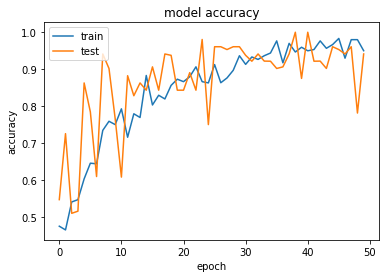

In [0]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

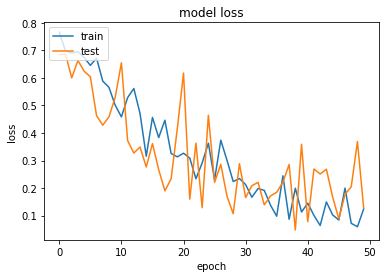

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Reflection**

This project's aim was to learn a real-life data driven problem and provide a solution with applling machine learning models. We managed to learn a lot of programming in Python, especially how to scrape data, clean data and apply neural networks for image data. We also managed to learn how to interpret and handle image data which was a new field for us.

One of the first hurdle was to how to convert image inputs into numbers. We had to understand image data structures and what pixels and RGB color channels are. Also we realized that input data cannot be 3D arrays so we had to flatten it and convert it lower dimensional arrays.

Moreover, one of the main problem was how to get same sized data from different sized images and also how to find the face on the picture. We realized that cropping and resizing cannot be applied as these distorted our images and this way it would have led to biased analysis. After searching for solution for days, fortunately managed to find a Python library.

Another problem was how to apply PCA to image data. When we tried to standardize image data arrays, PCA didn't give us accurate results so we dropped standardization and worked with the original pixels.

Careful examination showed that there are various ways of tuning the hyperparameters of the CNN model. We had to make some choices such as the values for the grid search of the parameters of our CNN classifier for instance. Also, we decided to tune just a few possible parameters due to computing capacity and running time.

Finally, Colab wasn't really working for us. When we tried to edit the notebook paralelly, we over saved on each other's files and lost our works a lot of times.


#Feedback#

In general we really liked and enjoyed this course. There was a lot of material provided during the classes. This was really nice, however, on the other hand it was sad that we did not have enough time to go over all the material and the code. Maybe it would be more interesting to go through the code in detail during the class to get a better understanding of the application. 

Since every team was mostly involved with different projects it was hard to focus on a certain topic in too many details during the lecture. It would be nice to have an opportunity to spend more time on a certain topic and study it well. 